In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.decomposition import PCA
import math

In [12]:
def K_scratch(dataframe,k,iters):
    print("k ==",k)
    #it moves the keys at the end of the rows
    ids=dataframe["track_id"].copy()
    del dataframe["track_id"]
    dataframe["track_id"]=ids
    dataframe["cluster_#"]=0

    differences=[]
    
    #it takes k rows from the dataframe excluding the string columns
    centroids=dataframe.iloc[:,:-5].sample(n=k)
    first=False
    diff=1
    steps=1
    PastDistance=0
    dataframe["cluster_#"]=0
    while diff!=0 and steps<=iters:
        distanceSum=0
        steps+=1
        #reset the column cluster_#
        #it iterates on each row(point)
        for i in range(len(dataframe)):
            #it keeps the distance of each node to the k clusters
            support=np.zeros(k)
            #it iterates on each centroids
            for j in range(len(centroids)):
                #it fills with all the distances
                r=np.asarray(dataframe.iloc[i,:-5])
                c=np.asarray(centroids.iloc[j,:])
                dist = np.linalg.norm(r-c)
                support[j]=dist
            #it associates the  i point to the cluster that minimize the distance that corrisponds to the index of support
            index=np.argmin(support)
            #it measure the total distance from each point to the centroid that is the nearest
            distanceSum+=support[index]
            dataframe.loc[i,"cluster_#"]=index
            #new centroids
        differences.append(distanceSum)   
        new_centroids=dataframe.groupby(["cluster_#"],group_keys=False).mean().iloc[:,:-1]
        if first:
            v=new_centroids-centroids
            diff=np.sum(np.sum(v,axis=1))
            #diff=distanceSum-PastDistance
            PastDistance=distanceSum
            centroids=new_centroids.copy()
        else:
            diff=1
            PastDistance=distanceSum
            centroids=new_centroids.copy()
            first=True
    vect=np.asarray(differences)
    return vect

In [13]:
dataset=pd.read_csv("final_dataset.csv")
dataset2=dataset.copy()
dataset2.shape

(13129, 60)

k == 11


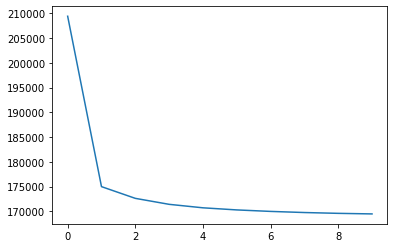

Wall time: 6min 19s


In [15]:
%%time
vect=K_scratch(dataset,11,10)
plt.plot(vect)
plt.show()

In [156]:
def printPivotTable(var):
    col = ["Variables", "Cluster #1", "Cluster #2", "Cluster #3", "Cluster #4", "Cluster #5", "Cluster #6",
           "Cluster #7", "Cluster #8", "Cluster #9", "Cluster #10", "Cluster #11"]
    df  = pd.DataFrame(columns=col, index=None)
    
    if var == "bit":
        df["Variables"] = ["< 80","< 130","< 180", "> 180", ""]
        for name in col[1:]:
            n_cluster = int(name.split("#")[1])
            l = [0,0,0,0,0]
            list_track = track[dataset["cluster_#"] == n_cluster-1]
            
            for x in list_track.audio_features_tempo:
                if x < 80:
                    l[0] += 1
                elif 80 < x < 130:
                    l[1] += 1
                elif 130 < x < 180:
                    l[2] += 1
                elif 180 < x:
                    l[3] += 1
                
            l = [round(100*x/len(list_track.audio_features_tempo),2) for x in l]
            s = sum(l)
            l[4] = s
            l = ['{:.2f}'.format(x)+"%" for x in l]
            df[name] = l 
            
    return df 

In [157]:
printPivotTable("bit")

,Variables,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11
0,< 80,4.91%,10.02%,11.68%,22.55%,5.47%,17.11%,10.85%,11.87%,5.22%,4.07%,9.00%
1,< 130,46.60%,54.66%,54.08%,54.52%,58.58%,55.08%,57.58%,56.38%,55.32%,43.76%,56.06%
2,< 180,37.10%,27.93%,30.43%,19.36%,29.56%,22.18%,27.62%,26.71%,31.19%,44.95%,30.93%
3,> 180,11.31%,7.39%,3.80%,3.57%,6.39%,5.64%,3.95%,5.04%,8.16%,7.22%,4.01%
4,,99.92%,100.00%,99.99%,100.00%,100.00%,100.01%,100.00%,100.00%,99.89%,100.00%,100.00%
